# 線形計画問題

In [ ]:
import numpy as np
from scipy import optimize

In [10]:
c = np.array([-3, -4], dtype=np.float64)
G = np.array([[1, 4], [2, 3], [2, 1]], dtype=np.float64)
h = np.array([1700, 1400, 1000], np.float64)
sol = optimize.linprog(c, A_ub=G, b_ub=h, bounds=(0, None), options={"disp":True})

Primal Feasibility  Dual Feasibility    Duality Gap         Step             Path Parameter      Objective          
1.0                 1.0                 1.0                 -                1.0                 -7.0                
0.06381473231862    0.06381473231863    0.06381473232344    0.9408453350344  0.06381473231861    -89.59846548849     
0.002313356625525   0.002313356625525   0.002313356625683   0.9638875509233  0.002313356625525   -1057.69478635      
0.0007942688345926  0.0007942688345929  0.0007942688346472  0.673798314491   0.0007942688345935  -1633.056988661     
1.364520230893e-05  1.364520230894e-05  1.36452023091e-05   0.9911075490472  1.364520230894e-05  -1994.066962257     
1.151094496759e-09  1.151094498846e-09  1.151094627024e-09  0.9999156573571  1.151094493006e-09  -1999.999498469     
Optimization terminated successfully.
         Current function value: -1999.999498
         Iterations: 5


In [9]:
print(sol.x)
print(sol.fun)

[399.99988463 199.99996114]
-1999.9994984688583


# ２次計画法

$$
    \frac{1}{2}x^{T}Px + q^{T}x
$$

In [11]:
import cvxopt

In [12]:
p = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))

sol = cvxopt.solvers.qp(p, q)

In [14]:
print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))

[[ 1.57009246e-16]
 [-2.00000000e+00]]
-4.0


In [22]:
P = cvxopt.matrix(np.array([[2, 1], [1, 2]], dtype=np.float64))
q = cvxopt.matrix(np.array([2, 4], dtype=np.float64))
A = cvxopt.matrix(np.array([[1, 1]], dtype=np.float64))
b = cvxopt.matrix(np.array([0], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, A=A, b=b)

In [23]:
print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))

[[ 1.]
 [-1.]]
-1.0000000000000013


In [25]:
G = cvxopt.matrix(np.array([[2, 3]], dtype=np.float64))
h = cvxopt.matrix(np.array([3], dtype=np.float64))

sol = cvxopt.solvers.qp(P, q, G=G, h=h)

     pcost       dcost       gap    pres   dres
 0:  1.8858e+00  2.9758e-01  2e+00  0e+00  2e+00
 1: -2.1066e+00 -2.1546e+00  5e-02  2e-16  7e-01
 2: -3.9999e+00 -4.0665e+00  7e-02  6e-16  8e-17
 3: -4.0000e+00 -4.0007e+00  7e-04  9e-16  1e-16
 4: -4.0000e+00 -4.0000e+00  7e-06  3e-16  6e-17
 5: -4.0000e+00 -4.0000e+00  7e-08  3e-16  2e-16
Optimal solution found.


In [26]:
print(np.array(sol["x"]))
print(np.array(sol["primal objective"]))

[[-2.45940165e-09]
 [-2.00000001e+00]]
-4.0


# 勾配降下法

$$
    \mathrm{Minimize} \quad 5x^2 - 6xy + 3y^2 + 6x -6y
$$

In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
def f(x, y):
    return 5 * x **2 - 6 * x* y +  3 * y ** 2 + 6 * x - 6 * y

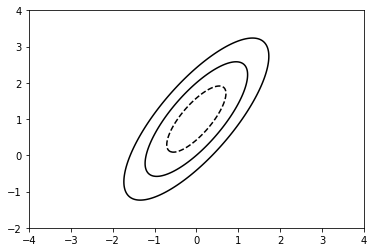

In [33]:
x = np.linspace(-4, 4, 300)
y = np.linspace(-2, 4, 300)
xmesh, ymesh = np.meshgrid(x, y)
z = f(xmesh.ravel(), ymesh.ravel()).reshape(xmesh.shape)
plt.contour(x, y, z, colors='k', levels=[-2, 0, 3])

$$
    \nabla f = \left(\begin{array} \\
    \frac{\delta f}{\delta x} \\
    \frac{\delta f}{\delta y}
    \end{array}\right)
$$

kがおおきくなる方向を向いたベクトルが $\nabla f$となる。
kを小さくするには $ - \nabla f$の方向に進む。
* パラメータ $\alpha, \epsilon$ が入力値として与えられる。
* 初期点 $ x_k $を決める。
* k を 0 から 1 ずつ増やしながら以下を繰り返す。
    1. $ || \nabla f(x_k) || < \epsilon $ であれば終了
    2. $ x_{k+1} = x_k - \alpha \nabla f(x_k)$ を計算する

In [64]:
class GradientDescent:
    # f : target function to optimize
    # df : derivative
    def __init__(self, f, df, alpha=0.01, eps=1e-6):
        self.f=f
        self.df=df
        self.alpha=alpha
        self.eps=eps
        self.path=None
        
    def solve(self, init):
        x = init
        path=[]
        grad = self.df(x)
        path.append(x)
        while (grad**2).sum() > self.eps**2:
            x = x -self.alpha * grad
            grad = self.df(x)
            path.append(x)
        self.path_ = np.array(path)
        self.x_ = x
        self.opt_ = self.f(x)

$$
    f = 5x^2 - 6xy + 3y^2 + 6x -6y \\
    \nabla f = \left(\begin{array} \\
    \frac{\delta f}{\delta x} \\
    \frac{\delta f}{\delta y}
    \end{array}\right) =
    \left(\begin{array} \\
    10x - 6y + 6 \\
    -6x +6y - 6
    \end{array}\right)
$$

In [58]:
# 最適化したい関数とその導関数の定義
def  f(xx):
    x = xx[0]
    y = xx[1]
    return 5 * x**2 - 6 * x * y + 3 * y**2 + 6 * x - 6 * y

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([10 * x - 6 * y + 6, \
                                 - 6 * x + 6 * y - 6])

In [65]:
# 最適化の計算
algo = GradientDescent(f, df)
initial = np.array([1, 1])
algo.solve(initial)
print(algo.x_)
print(algo.opt_)

[3.45722846e-07 1.00000048e+00]
-2.9999999999997073


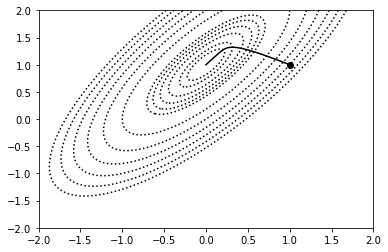

In [66]:
# 描画
plt.scatter(initial[0], initial[1], color="k", marker="o")
plt.plot(algo.path_[:, 0], algo.path_[:, 1], color="k", linewidth=1.5)
xs = np.linspace(-2, 2, 300)
ys = np.linspace(-2, 2, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
levels = [-3, -2.9, -2.8, -2.6, -2.4, -2.2, -2, -1, 0, 1, 2, 3, 4]
plt.contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors="k", linestyles="dotted")

/opt/anaconda3/envs/VariationalBayesianLearning/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in square
  app.launch_new_instance()
/opt/anaconda3/envs/VariationalBayesianLearning/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: overflow encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.
/opt/anaconda3/envs/VariationalBayesianLearning/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/opt/anaconda3/envs/VariationalBayesianLearning/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in subtract


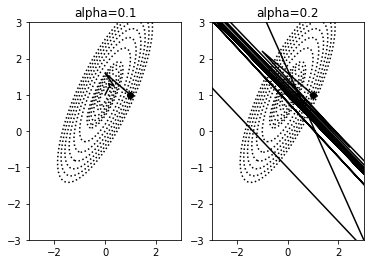

In [72]:
# 最適化の計算
algos = []
initial = np.array([1, 1])
alphas = [0.1, 0.2]
for alpha in alphas:
    algo = GradientDescent(f, df, alpha)
    algo.solve(np.array(initial))
    algos.append(algo)

xs = np.linspace(-3, 3, 300)
ys = np.linspace(-3, 3, 300)
xmesh, ymesh = np.meshgrid(xs, ys)
xx = np.r_[xmesh.reshape(1, -1), ymesh.reshape(1, -1)]
fig, ax = plt.subplots(1, 2)
for i in range(2):
    ax[i].set_xlim((-3, 3))
    ax[i].set_ylim((-3, 3))
    ax[i].set_title("alpha={}".format(alphas[i]))
    ax[i].scatter(initial[0], initial[1], color="k", marker="o")
    ax[i].plot(algos[i].path_[:, 0], algos[i].path_[:, 1], color="k", linewidth=1.5)
    ax[i].contour(xs, ys, f(xx).reshape(xmesh.shape), levels=levels, colors="k", linestyles="dotted")

# ニュートン法

方程式の解を数値的に求める方法 \
$x = x_k $における接線と x 軸との交点を $x_{k+1}$とする　\
終了条件 $ | x_{k+1} - x_k | \leq \epsilon$ \
$x = x_k $における接線の傾きは $f'(x_k)$ であり以下で表される

$$
    y = f'(x_k)(x - x_k) + f(x_k)
$$

$y=0, x=x_{k+1}$ とすると

$$
    x_{k+1} = x_k - \frac{f'(x_k)}{f(x_k)}
$$

ニュートン法を用いて次の方程式の解を求める
$$
    x^3 - 5x +1 =0
$$

In [87]:
def newton1dim(f, df, x0, eps=1e-10, max_iter=1000):
    x = x0
    _iter=0
    while True:
        x_new = x -f(x)/df(x)
        if abs(x-x_new) < eps:
            break
        x = x_new
        _iter+=1
        if _iter==max_iter: 
            break
    return x_new

In [74]:
def f(x):
    return x**3 - 5*x +1
def df(x):
    return 3*x**2 - 5

In [88]:
print(newton1dim(f, df, 2))

2.1284190638445777


In [89]:
print(newton1dim(f, df, 0))

0.20163967572340463


In [90]:
print(newton1dim(f, df, -3))

-2.330058739567982


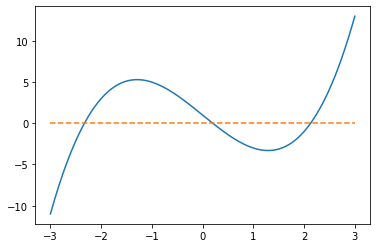

In [98]:
xs = np.linspace(-3, 3, 300)
def y_line(x):
    return 0 * x
plt.plot(xs, f(xs))
plt.plot(xs, y_line(xs), linestyle="--")

## ニュートン法を多次元に拡張

$$
    \begin{cases}
        f_1(x, y) = x^3 - 2y = 0 \\
        f_2(x, y) = x^2 + y^2 -1 = 0 \\
    \end{cases}
$$
$f$ を以下のように定義
$$
    f(x) = \left(\begin{array}{c}
        f_1(x) \\
        f_2(x) \\
    \end{array}\right)
$$

$f$ のヤコビアン行列 $J_f$ を次で定義
$$
    J_f(x) = \left(\begin{array}{cc}
        \frac{\delta f_1}{\delta x} (x) \quad \frac{\delta f_1}{\delta y}(x) \\
        \frac{\delta f_2}{\delta x} (x) \quad \frac{\delta f_2}{\delta y}(x) \\
    \end{array}\right)
$$

このニュートン法は次の更新式で与えられる
$$
    x_{k+1} = x_k - J_f(x_k)^{-1}f(x_k)
$$

In [103]:
class Newton:
    def __init__(self, f, df, eps=1e-10, max_iter=1000):
        self.f = f
        self.df = df
        self.eps = eps
        self.max_iter = max_iter
        
    def solve(self, x0):
        x = x0
        iter = 0
        self.path_ = x0.reshape(1, -1)
        while True:
            x_new = x - np.dot(np.linalg.inv(self.df(x)), self.f(x))
            self.path_ = np.r_[self.path_, x_new.reshape(1, -1)]
            if((x - x_new) ** 2).sum() < self.eps**2:
                break
            x = x_new
            iter += 1
            if iter == self.max_iter:
                break
        return x_new

In [100]:
def f1(x, y):
    return x**3 - 2*y

def f2(x, y):
    return x**2 + y**2 -1

def f(xx):
    x = xx[0]
    y = xx[1]
    return np.array([f1(x, y), f2(x, y)])

def df(xx):
    x = xx[0]
    y = xx[1]
    return np.array([[3*x**2, -2], [2*x, 2*y]])

[0.92071038 0.39024659]
[-0.92071038 -0.39024659]
[-0.92071038 -0.39024659]


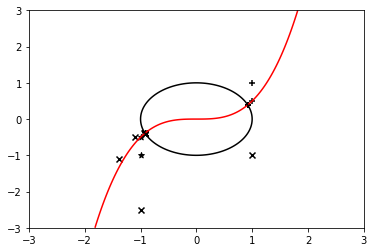

In [104]:
xmin, xmax, ymin, ymax = -3, 3, -3, 3
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
x = np.linspace(xmin, xmax, 200)
y = np.linspace(xmin, xmax, 200)
xmesh, ymesh = np.meshgrid(x, y)
z1 = f1(xmesh, ymesh)
z2 = f2(xmesh, ymesh)
plt.contour(xmesh, ymesh, z1, colors="r", levels=[0])
plt.contour(xmesh, ymesh, z2, colors="k", levels=[0])
solver = Newton(f, df)
initials = [np.array([1, 1]),    # marker "+"
                 np.array([-1, -1]), # marker "*"
                 np.array([1, -1])]  # marker "x"

markers = ["+", "*", "x"]

for x0, m in zip(initials, markers):
    sol = solver.solve(x0)
    plt.scatter(solver.path_[:, 0], 
                        solver.path_[:, 1], color="k", marker=m)
    print(sol)

# ラグランジュ未定乗数法

制約式も線形とは限らない最適化問題を考える
$$
    \begin{align}
    &\mathrm{Minimize} \quad &f(x, y) &= 5x^2 + 6xy + 5y^2 - 26x -26y \\
    &\mathrm{Subject to} \quad &g(x, y) &= x^2 + y^2 -4 = 0
    \end{align}
$$

以下の３変数関数$L$(ラグランジュ関数)を考える
$$
    \begin{align}
    L(x, y, \lambda) &= f(x, y) + \lambda g(x, y) \\
                         & = 5x^2 + 6xy + 5y^2 - 26x -26y + \lambda(x^2 + y^2 -4)
    \end{align}
$$
このとき $\lambda$ はラグランジュ乗数と呼ばれる. 

これを最大化することを考える、すなわち以下を解く
$$
    \nabla L(x, y, \lambda) = 0
$$